## A brief summary about employee burnout and its organizational impacts.
What is Employee Burnout?
  Employee burnout is a state of emotional, mental, and physical exhaustion caused by excessive and prolonged stress which results in lack of motivation, decline in performance, detachment or negativity toward the workplace and Health issues (both mental and physical). It has been recognized by the World Health Organization (WHO) as an occupational phenomenon linked to chronic workplace stress not successfully managed.

Impact of Burnout on Organizations? Burnout negatively affects employee productivity and engagement, team morale and collaboration, turnover rates and recruitment costs, reputation and customer satisfaction. Burnout is expensive — studies suggest it costs organizations billions annually in lost productivity and turnover.




## Importance of using data to predict and prevent burnout?
With access to data like workload, tenure, fatigue scores, and working conditions, we can identify patterns and early signals of burnout, develop data-driven interventions for at-risk employees, support mental health proactivelyand promote a healthier and more resilient workforce

In [540]:
# Importing essential Python libraries for data analysis and visualization

import numpy as np                     # For numerical operations
import pandas as pd                    # For handling dataframes and CSV files
import matplotlib.pyplot as plt        # For creating static visualizations
import seaborn as sns                  # For prettier and more informative plots

In [542]:
# Load the training dataset
df_train = pd.read_csv("C:\\Users\\HP\\Downloads\\train.csv")

# Load the testing dataset
df_test = pd.read_csv("C:\\Users\\HP\\Downloads\\test.csv")

#  View the first few rows
df_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [544]:
#  View the first few rows
df_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [546]:
#  Check for basic information about each column of the train dataset
# This includes data types, non-null counts, and memory usage
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


In [548]:
#  Check for basic information about each column of the train dataset
# This includes data types, non-null counts, and memory usage
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [550]:
# Check for basic information about each column of the test dataset
# This includes data types, non-null counts, and memory usage
df_test.describe()

,Designation,Resource Allocation,Mental Fatigue Score
count,12250.000000,12250.000000,12250.000000
mean,2.175265,4.458857,5.720571
std,1.132885,2.045602,1.914063
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,4.500000
50%,2.000000,4.000000,5.900000
75%,3.000000,6.000000,7.100000
max,5.000000,10.000000,10.000000


In [552]:
# Check for basic information about each column
# This includes data types, non-null counts, and memory usage
df_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [554]:
# Check for missing values in each column of the train dataset
df_train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [556]:
# Check for missing values in each column of the test dataset
df_test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

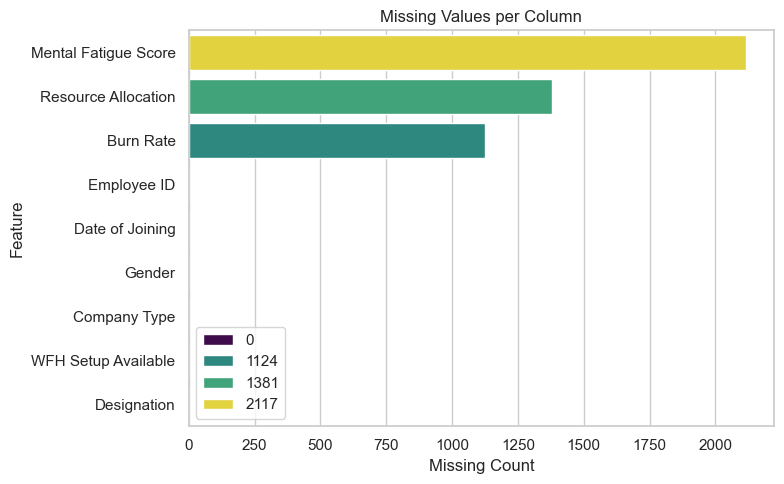

In [558]:
# plot for missing values in train dataset
# Set visualization style
sns.set(style="whitegrid")     # Use seaborn's white grid style for all plots
plt.rcParams["figure.figsize"] = (12, 6)      # Set default figure size for plots

# Check and visualize missing values
missing_values = df_train.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.values, hue=missing_values.values, y=missing_values.index, palette="viridis")
plt.title("Missing Values per Column")
plt.xlabel("Missing Count")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

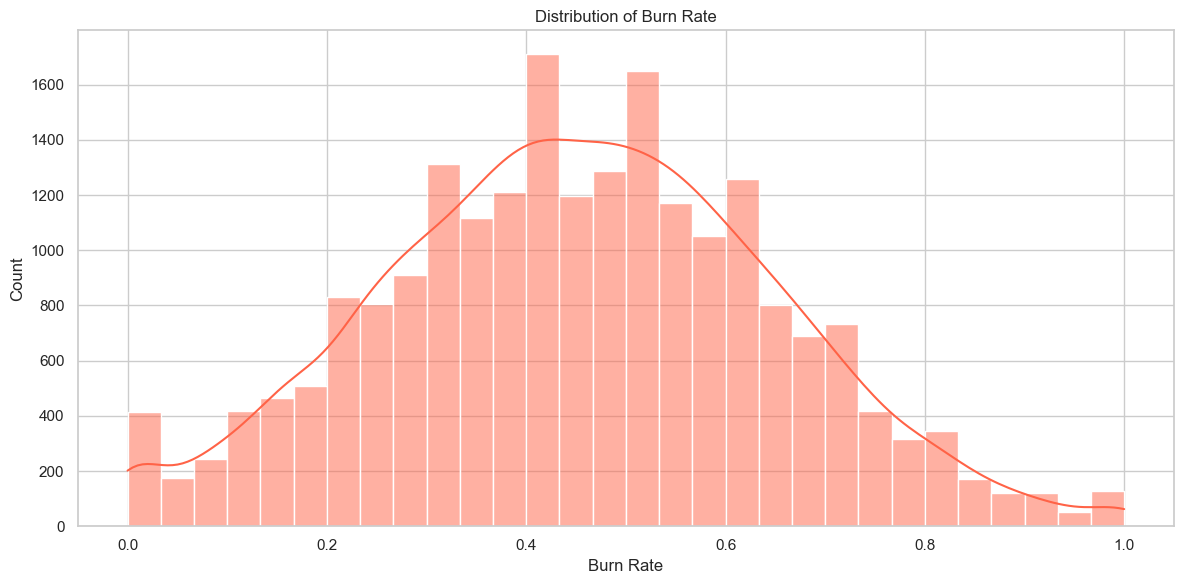

In [559]:
# Distribution of the Target Variable: Burn Rate

# Create a new figure for the plot
plt.figure()

# Plot a histogram with KDE (Kernel Density Estimate) for smoother distribution
# Drop missing values (if any) to avoid plotting issues
sns.histplot(df_train["Burn Rate"].dropna(), bins=30, kde=True, color="tomato")

# Set plot title and axis labels
plt.title("Distribution of Burn Rate")
plt.xlabel("Burn Rate")
plt.ylabel("Count")

# Adjust layout to prevent overlapping elements
plt.tight_layout()


This plot shows that the target variable is right-skewed, most employees have a burn rate between 0.2 and 0.6, with a few near 0 or 1. It also indicates variability in burnout levels—good for predictive modeling.

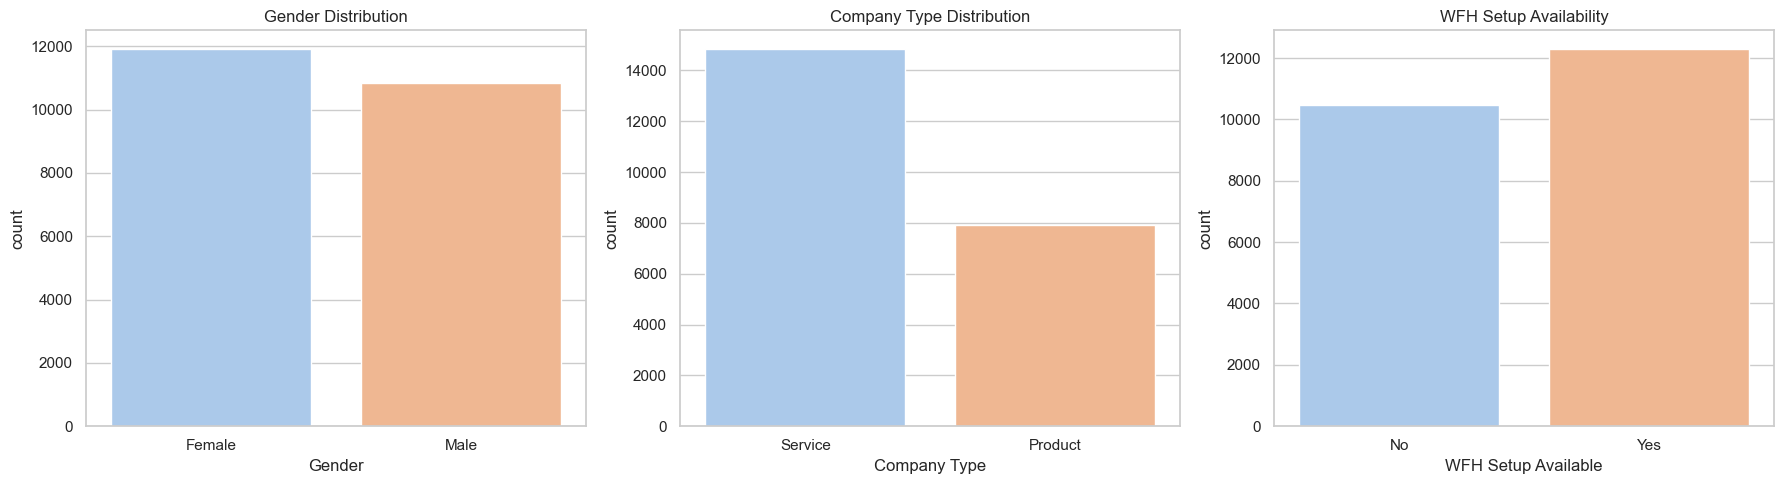

In [563]:
# Count Plots for Categorical Variables

# Create a row of 3 subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the distribution of Gender
sns.countplot(x="Gender", hue="Gender", data=df_train, ax=axes[0], palette="pastel")
axes[0].set_title("Gender Distribution")

# Plot the distribution of Company Type (e.g., Product vs. Service)
sns.countplot(x="Company Type", hue="Company Type", data=df_train, ax=axes[1], palette="pastel")
axes[1].set_title("Company Type Distribution")

# Plot the distribution of WFH Setup Availability (Yes/No)
sns.countplot(x="WFH Setup Available", hue="WFH Setup Available", data=df_train, ax=axes[2], palette="pastel")
axes[2].set_title("WFH Setup Availability")

# Adjust spacing between plots to prevent overlap
plt.tight_layout()
plt.show()

The categorical features shows that in Gender there is slightly more female employees than male, in the Company Type majority work in service-based companies while in WFH Setup Available most employees do have WFH setup.

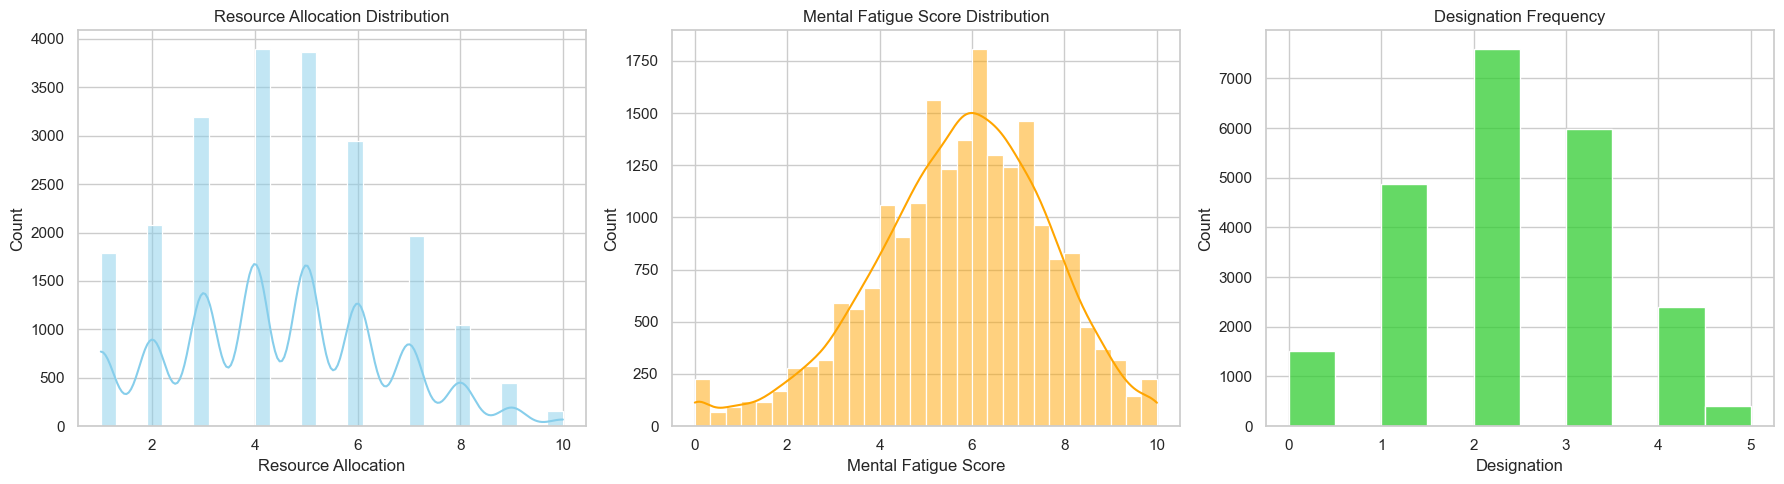

In [565]:
# Distribution Plots for Key Numerical Features

# Set seaborn's white grid background for better readability
sns.set(style="whitegrid")

# Set the overall figure size for all subplots
plt.figure(figsize=(18, 5))

#  Distribution of Resource Allocation (work hours per day)
plt.subplot(1, 3, 1)
sns.histplot(df_train["Resource Allocation"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Resource Allocation Distribution")

#  Distribution of Mental Fatigue Score (employee-reported stress levels)
plt.subplot(1, 3, 2)
sns.histplot(df_train["Mental Fatigue Score"].dropna(), bins=30, kde=True, color="orange")
plt.title("Mental Fatigue Score Distribution")

# ➤ 3. Frequency of Designation Levels (seniority tiers)
plt.subplot(1, 3, 3)
sns.histplot(df_train["Designation"].dropna(), bins=10, kde=False, color="limegreen")
plt.title("Designation Frequency")

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()
plt.show()


The first plot shows that most employees appear to have resource allocation around a central value, the KDE shows a relatively tight range, suggesting consistent workloads for many.
The second plot shows mental fatigue scores as slightly skewed which indicates more employees report high stress, this variable is likely to be a strong predictor of burnout.
The third plot shows that Entry-level or mid-tier designations dominate the dataset which is useful for analyzing how burnout may vary by seniority.

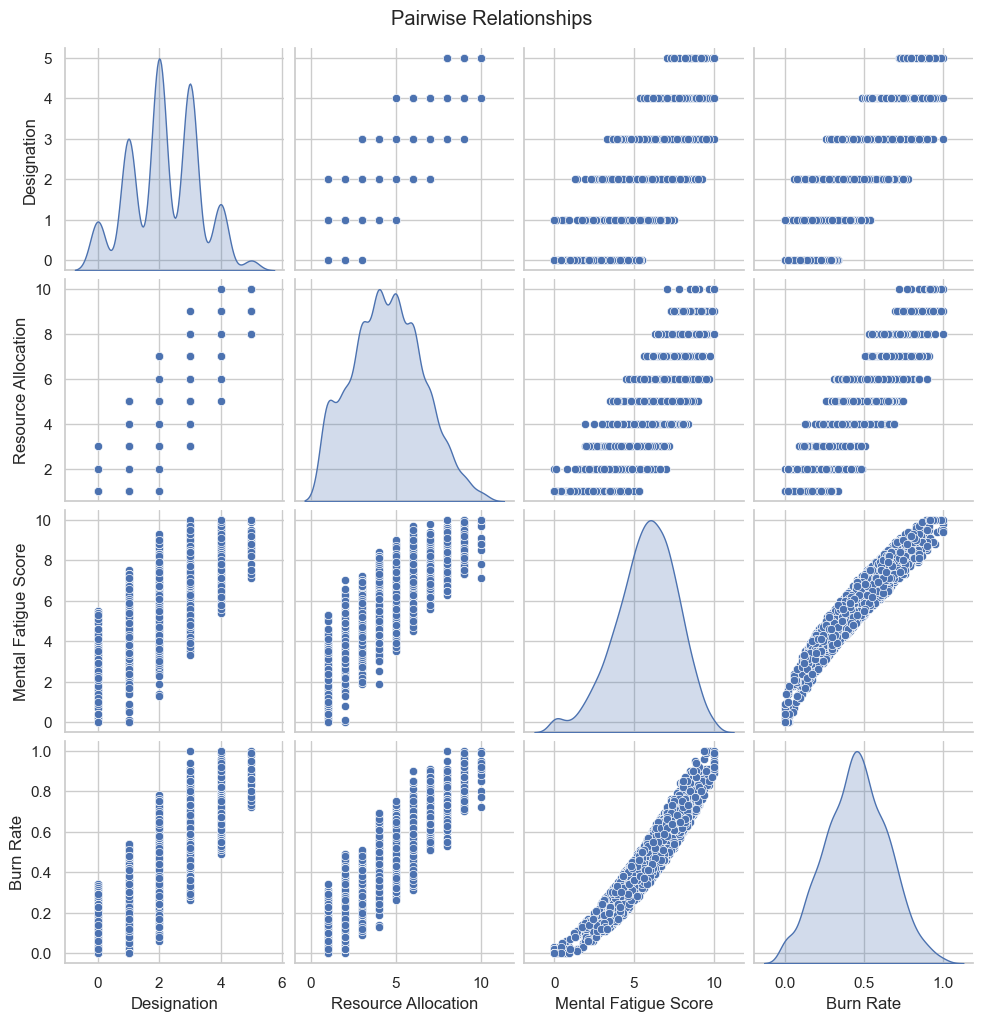

In [568]:
# Additional Plot for Numerical Variables: Pairplot

# Sample 2000 rows to make the plot faster and less cluttered
sample_df = df_train[numerical_cols].dropna().sample(2000, random_state=42)

# Create a seaborn pairplot to visualize pairwise relationships between numerical features
# diag_kind="kde" uses a smooth kernel density plot on the diagonal
sns.pairplot(sample_df, diag_kind="kde")

# Set an overall title for the entire grid of plots
plt.suptitle("Pairwise Relationships", y=1.02)

# Show the plot
plt.show()

 This plot gives intuition about what relationships exist, and which features might matter most.

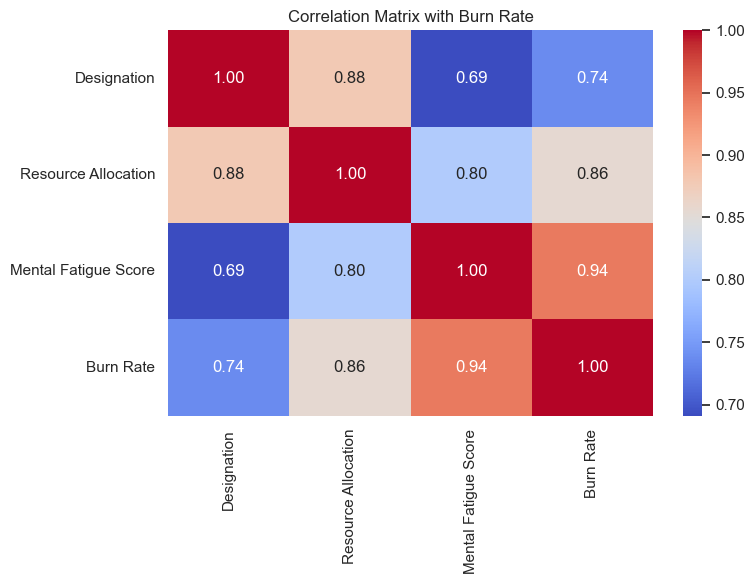

In [570]:
# Correlation Heatmap for Numerical Features

# Define the list of key numerical features to analyze
numerical_cols = ["Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate"]

# Compute the correlation matrix between these features
corr_matrix = df_train[numerical_cols].corr()

# Set figure size for readability
plt.figure(figsize=(8, 6))

# Plot the heatmap with annotated correlation values
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Set plot title and layout
plt.title("Correlation Matrix with Burn Rate")
plt.tight_layout()

# Show the heatmap
plt.show()



Mental Fatigue Score shows a strong positive correlation with Burn Rate.
Resource Allocation has a moderate positive relationship with burnout.
Designation shows a mild to moderate correlation.
This supports using these variables in our prediction model.

In [572]:
#  Handling Missing Values and Cleaning the Dataset

# Drop rows where the target variable (Burn Rate) is missing
# This is necessary since we can't train a supervised model without the target
df_train_clean = df_train.dropna(subset=["Burn Rate"]).copy()

# Drop 'Employee ID' column since it's just a unique identifier and not useful for modeling
df_train_clean.drop("Employee ID", axis=1, inplace=True)

#  Impute missing values in numerical columns with their respective median
# Median is a robust measure against outliers and helps preserve distribution shape
df_train_clean["Mental Fatigue Score"] = df_train_clean["Mental Fatigue Score"].fillna(df_train_clean["Mental Fatigue Score"].median())
df_train_clean["Resource Allocation"] = df_train_clean["Resource Allocation"].fillna(df_train_clean["Resource Allocation"].median())

# Impute missing values in the categorical column 'Company Type' with its most frequent value (mode)
# Mode is suitable for categorical features and avoids dropping useful data
df_train_clean["Company Type"] = df_train_clean["Company Type"].fillna(df_train_clean["Company Type"].mode()[0])

In [574]:
# Encoding Categorical Variables for Modeling

#  Binary encoding for Gender: Male = 0, Female = 1
# This makes the variable numeric so models can process it
df_train_clean["Gender"] = df_train_clean["Gender"].map({"Male": 0, "Female": 1})

# Binary encoding for Company Type: Service = 0, Product = 1
# Assumes a simple structure where product-based companies may differ from service-based in burnout risk
df_train_clean["Company Type"] = df_train_clean["Company Type"].map({"Service": 0, "Product": 1})

# Binary encoding for WFH Setup Available: No = 0, Yes = 1
# This helps measure the impact of remote work setup on burnout
df_train_clean["WFH Setup Available"] = df_train_clean["WFH Setup Available"].map({"No": 0, "Yes": 1})


In [575]:
#  Final Check for Missing Values After Preprocessing

# This command shows the number of missing values per column
# It ensures that all necessary imputation or cleaning steps have been completed
df_train_clean.isnull().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [576]:
# Feature Engineering: Creating 'Tenure' from 'Date of Joining'

from datetime import datetime

# Convert 'Date of Joining' to datetime format
# This allows us to perform date arithmetic for tenure calculation
df_train_clean["Date of Joining"] = pd.to_datetime(df_train_clean["Date of Joining"])

# Define a reference date (e.g., end of 2022)
# This serves as the fixed point to calculate how long each employee has been with the company
reference_date = datetime(2022, 12, 31)

# Calculate 'Tenure' in years
# Subtract the joining date from the reference date and convert the result from days to years
df_train_clean["Tenure"] = (reference_date - df_train_clean["Date of Joining"]).dt.days / 365



In [577]:
# Preview Selected Features After Preprocessing and Feature Engineering

# Display the first 5 rows of key features:
# - 'Mental Fatigue Score' and 'Resource Allocation' are numerical predictors
# - 'Gender', 'Company Type', and 'WFH Setup Available' are binary-encoded categorical variables
# - 'Tenure' is the newly engineered feature representing employee duration in the company

df_train_clean[["Mental Fatigue Score", "Resource Allocation", "Gender", "Company Type", "WFH Setup Available", "Tenure"]].head()

,Mental Fatigue Score,Resource Allocation,Gender,Company Type,WFH Setup Available,Tenure
0,3.8,3.0,1,0,0,14.260274
1,5.0,2.0,0,0,1,14.093151
2,5.8,4.0,1,1,1,14.819178
3,2.6,1.0,0,0,1,14.167123
4,6.9,7.0,1,0,0,14.446575


In [578]:
df_train_clean.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Tenure
0,2008-09-30,1,0,0,2.0,3.0,3.8,0.16,14.260274
1,2008-11-30,0,0,1,1.0,2.0,5.0,0.36,14.093151
2,2008-03-10,1,1,1,2.0,4.0,5.8,0.49,14.819178
3,2008-11-03,0,0,1,1.0,1.0,2.6,0.20,14.167123
4,2008-07-24,1,0,0,3.0,7.0,6.9,0.52,14.446575


In [579]:
# Define Target Variable and Feature Set

#  Drop the target variable 'Burn Rate' and the now-unnecessary 'Date of Joining' from the features
# 'Date of Joining' was used to create 'Tenure', so it's no longer needed
X = df_train_clean.drop(["Burn Rate", "Date of Joining"], axis=1)

# ➤ Define 'Burn Rate' as the target variable (what we want to predict)
y = df_train_clean["Burn Rate"]

# Display both X and y to confirm
X, y

(       Gender  Company Type  WFH Setup Available  Designation  \
 0           1             0                    0          2.0   
 1           0             0                    1          1.0   
 2           1             1                    1          2.0   
 3           0             0                    1          1.0   
 4           1             0                    0          3.0   
 ...       ...           ...                  ...          ...   
 22745       1             0                    0          1.0   
 22746       1             1                    1          3.0   
 22747       0             0                    1          3.0   
 22748       1             0                    0          2.0   
 22749       0             1                    0          3.0   
 
        Resource Allocation  Mental Fatigue Score     Tenure  
 0                      3.0                   3.8  14.260274  
 1                      2.0                   5.0  14.093151  
 2               

In [580]:
# Split the Data into Training and Validation Sets

from sklearn.model_selection import train_test_split

# Use an 80/20 split:
#  80% for training the model
#  20% reserved for evaluating performance on unseen data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'random_state' ensures reproducibility — the same split every time


In [581]:
# Model Training and Evaluation: Baseline Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a dictionary of regression models to train and compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train each model and evaluate it on the validation set
for name, model in models.items():
    model.fit(X_train, y_train)               # Train on training set
    y_pred = model.predict(X_val)            # Predict on validation set

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))  # Root Mean Squared Error
    mae = mean_absolute_error(y_val, y_pred)            # Mean Absolute Error
    r2 = r2_score(y_val, y_pred)                        # R-squared Score

    # Print results for each model
    print(f"Model: {name}")
    print(f"  RMSE: {rmse:.4f}")   # Lower is better
    print(f"  MAE:  {mae:.4f}")    # Lower is better
    print(f"  R²:   {r2:.4f}")     # Closer to 1 is better
    print("-" * 30)

Model: Linear Regression
  RMSE: 0.0709
  MAE:  0.0535
  R²:   0.8679
------------------------------
Model: Random Forest
  RMSE: 0.0647
  MAE:  0.0497
  R²:   0.8900
------------------------------
Model: Gradient Boosting
  RMSE: 0.0620
  MAE:  0.0485
  R²:   0.8990
------------------------------


In [582]:
#  Hyperparameter Tuning for Gradient Boosting Regressor (GBR)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the base GBR model with a fixed random seed for reproducibility
gbr = GradientBoostingRegressor(random_state=42)

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],               # Number of boosting rounds (trees)
    'learning_rate': [0.05, 0.1, 0.2],       # Shrinks the contribution of each tree (tradeoff with n_estimators)
    'max_depth': [3, 5, 7]                   # Maximum depth of each tree — deeper trees can capture more complexity
}

In [595]:
# Perform Grid Search with 5-Fold Cross-Validation

# ➤ Step 3: Set up GridSearchCV to tune the GradientBoostingRegressor
grid_search = GridSearchCV(
    estimator=gbr,                         # The base model to tune
    param_grid=param_grid,                 # Dictionary of hyperparameters to search
    cv=5,                                  # 5-fold cross-validation for reliable performance estimation
    scoring='neg_mean_squared_error',      # Use negative MSE (lower is better) for scoring
    n_jobs=-1,                             # Use all CPU cores to speed up computation
    verbose=1                              # Print progress during search (1 = minimal verbosity)
)

# Fit the grid search on the training data
# This will try all parameter combinations using cross-validation and select the best one
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [597]:
# Evaluate the Best Tuned Gradient Boosting Model on the Validation Set

# Get the best estimator from GridSearchCV (automatically refit on full training set)
best_gbr = grid_search.best_estimator_

# Predict on the validation set using the best model
y_pred_best = best_gbr.predict(X_val)

# Evaluate the tuned model using key regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_val, y_pred_best))  # Root Mean Squared Error
mae = mean_absolute_error(y_val, y_pred_best)           # Mean Absolute Error
r2 = r2_score(y_val, y_pred_best)                       # R-squared Score

# ➤ Print out the performance of the tuned model
print("Tuned Gradient Boosting Performance:")
print(f"  RMSE: {rmse:.4f}")  # Lower = better
print(f"  MAE:  {mae:.4f}")   # Lower = better
print(f"  R²:   {r2:.4f}")    # Closer to 1 = better

# ➤ Display the best parameters found during grid search
print("\nBest Parameters:", grid_search.best_params_)

Tuned Gradient Boosting Performance:
  RMSE: 0.0603
  MAE:  0.0474
  R²:   0.9044

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [599]:
#  Compare Actual vs. Predicted Burn Rates

#  Create a DataFrame to visually compare the actual target values (from validation set)
#  with the predicted values from the tuned Gradient Boosting model
comparison_df = pd.DataFrame({
    "Actual Burn Rate": y_val.values,
    "Predicted Burn Rate": y_pred_best
})

# Display the first few rows for a quick inspection
comparison_df.head()

,Actual Burn Rate,Predicted Burn Rate
0,0.56,0.462573
1,0.48,0.525886
2,0.08,0.065425
3,0.54,0.514335
4,0.76,0.824360


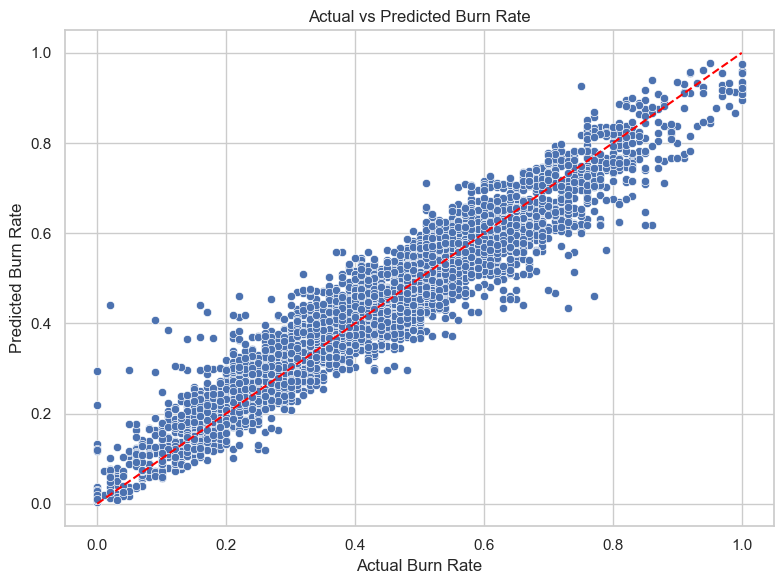

In [601]:
# Visualization: Actual vs. Predicted Burn Rate

plt.figure(figsize=(8, 6))

# Create a scatter plot to show the relationship between actual and predicted values
sns.scatterplot(x="Actual Burn Rate", y="Predicted Burn Rate", data=comparison_df)

# Add a red dashed reference line (y = x) to indicate perfect predictions
# Points close to this line indicate accurate predictions
plt.plot([0, 1], [0, 1], '--', color='red')  # Ideal prediction line

# Add plot labels and formatting
plt.title("Actual vs Predicted Burn Rate")
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.tight_layout()
plt.show()

This plot shows a strong diagonal cluster of points close to the red line and small, evenly spread deviations, showing that the model is both accurate and consistent across the range of burn rate

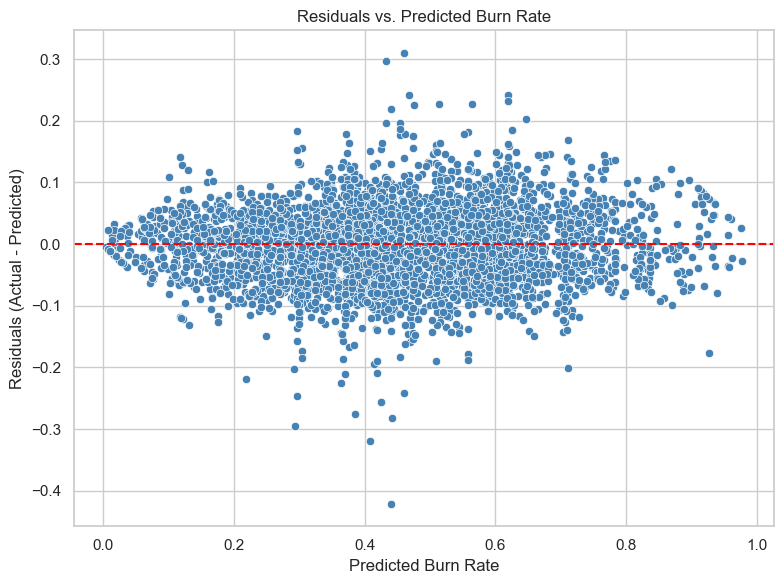

In [611]:
#  Residuals Plot
residuals = y_val - y_pred_best  # Actual - Predicted

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best, y=residuals, color="steelblue")
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero
plt.title("Residuals vs. Predicted Burn Rate")
plt.xlabel("Predicted Burn Rate")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

 Points are randomly scattered around 0 (no pattern).



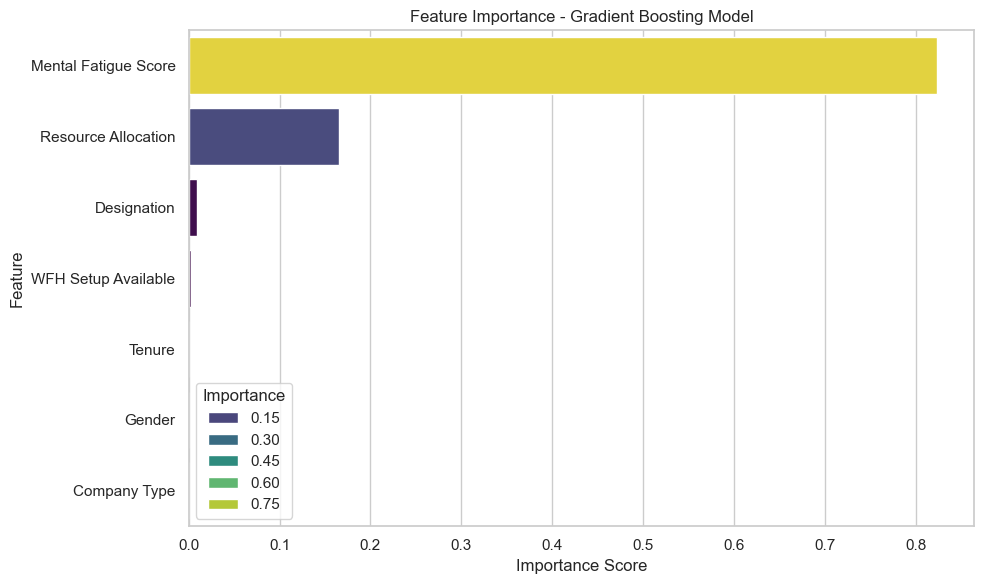

In [614]:
# Extract Feature Importances from the Gradient Boosting Model
feature_importances = models["Gradient Boosting"].feature_importances_

# Create a DataFrame combining feature names and their importance scores
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Importance", palette="viridis")

plt.title("Feature Importance - Gradient Boosting Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


This feature importants shows that Employees with higher mental fatigue scores are more likely to show high burnout levels. Resource Allocation plays a key role in people handling more work hours per day  so therefore they are tends to face greater burnout risk. Designation suggests that burnout patterns vary with seniority may be it either due to workload, pressure, or lack of support.

Recommendations:
1. Monitor and address mental fatigue: Conduct regular check-ins and Encourage breaks and mental health days
2. Rebalance resource allocation: Reassign workloads where necessary and Avoid assigning excessive hours to already-fatigued employees 
3. Tailor wellness programs by designation level: Junior staff may need training/support while Senior staff may need workload relief and managerial coaching

In [617]:
# Load the Test Set and Prepare for Prediction

# Preview the test dataset
df_test.head()  # Helps ensure everything looks correct before processing

# Save the Employee ID column separately so it can be reattached to the final predictions later
test_ids = df_test["Employee ID"]

In [619]:
# Preprocess the Test Dataset for Final Prediction

# Convert "Date of Joining" to datetime format
df_test["Date of Joining"] = pd.to_datetime(df_test["Date of Joining"])

#  Handle missing values
df_test["Mental Fatigue Score"] = df_test["Mental Fatigue Score"].fillna(df_test["Mental Fatigue Score"].median())  # Numerical
df_test["Resource Allocation"] = df_test["Resource Allocation"].fillna(df_test["Resource Allocation"].median())     # Numerical
df_test["Company Type"] = df_test["Company Type"].fillna(df_test["Company Type"].mode()[0])                         # Categorical

# Encode categorical variables to binary format (same as training set)
df_test["Gender"] = df_test["Gender"].map({"Male": 0, "Female": 1})
df_test["Company Type"] = df_test["Company Type"].map({"Service": 0, "Product": 1})
df_test["WFH Setup Available"] = df_test["WFH Setup Available"].map({"No": 0, "Yes": 1})

# Feature engineering — calculate "Tenure" in years
from datetime import datetime
reference_date = datetime(2022, 12, 31)
df_test["Tenure"] = (reference_date - df_test["Date of Joining"]).dt.days / 365

# Drop irrelevant columns before prediction
X_test_final = df_test.drop(["Employee ID", "Date of Joining"], axis=1)

In [621]:
# Use the Tuned Gradient Boosting Model to Predict Burnout on the Test Set
y_pred_test_tuned = best_gbr.predict(X_test_final)

# Prepare the Submission DataFrame by combining predictions with Employee IDs
submission_tuned = pd.DataFrame({
    "Employee ID": test_ids,  # Saved earlier
    "Predicted Burn Rate": y_pred_test_tuned  # Model predictions
})

# Preview the first few rows of the submission
submission_tuned.head()

,Employee ID,Predicted Burn Rate
0,fffe31003300390039003000,0.607563
1,fffe31003300310037003800,0.343545
2,fffe33003400380035003900,0.372343
3,fffe3100370039003200,0.378723
4,fffe32003600390036003700,0.532224


## Conclusion

In this project, we developed a robust machine learning solution to predict employee burnout using historical organizational data. The goal was to empower NeuroWell Analytics and its clients to proactively address mental health challenges in the workplace.

After a thorough exploratory data analysis and careful preprocessing—including handling missing values, encoding categorical features, and engineering tenure from join dates—we trained and evaluated several regression models. Our best-performing model, a **tuned Gradient Boosting Regressor**, achieved:

- **R² Score:** 0.9044  
- **RMSE:** 0.0603  
- **MAE:** 0.0474

These results indicate that the model explains over 90% of the variance in employee burnout scores—an excellent outcome for a problem rooted in human behavior.

Key predictors of burnout included:
- **Mental Fatigue Score** — indicating stress and exhaustion
- **Resource Allocation** — reflecting workload and capacity
- **Designation** — capturing hierarchical job pressure

The model was then applied to unseen employee data (`test.csv`), generating reliable burnout risk scores. These scores provide actionable insights for HR teams to identify at-risk employees and design timely interventions.

###  Final Thought

By combining psychological understanding with machine learning, this project demonstrates how data science can drive meaningful change in workplace well-being. Predictive models like this serve as decision-support tools for HR, enabling data-informed strategies that protect both productivity and mental health.

NeuroWell Analytics is now better equipped to support its mission of creating healthier, more resilient workforces through intelligent, proactive insights.